In [61]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data and show the info 
data = pd.read_csv('https://query.data.world/s/3aqlduehhnldd3mrwr76lbvur7sepq?dws=00000')


In [62]:
data.head(10)

ID   area  perimeter  compactness  lengthOfKernel  widthOfKernel  \
0   1  15.26      14.84       0.8710           5.763          3.312   
1   2  14.88      14.57       0.8811           5.554          3.333   
2   3  14.29      14.09       0.9050           5.291          3.337   
3   4  13.84      13.94       0.8955           5.324          3.379   
4   5  16.14      14.99       0.9034           5.658          3.562   
5   6  14.38      14.21       0.8951           5.386          3.312   
6   7  14.69      14.49       0.8799           5.563          3.259   
7   8  14.11      14.10       0.8911           5.420          3.302   
8   9  16.63      15.46       0.8747           6.053          3.465   
9  10  16.44      15.25       0.8880           5.884          3.505   

   asymmetryCoefficient  lengthOfKernelGroove  seedType  
0                 2.221                 5.220         1  
1                 1.018                 4.956         1  
2                 2.699                 4.825         1  
3                 2.259                 4.805         1  
4                 1.355                 5.175         1  
5                 2.462                 4.956         1  
6                 3.586                 5.219         1  
7                 2.700                 5.000         1  
8                 2.040                 5.877         1  
9                 1.969                 5.533         1

In [63]:
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    210 non-null    int64  
 1   area                  210 non-null    float64
 2   perimeter             210 non-null    float64
 3   compactness           210 non-null    float64
 4   lengthOfKernel        210 non-null    float64
 5   widthOfKernel         210 non-null    float64
 6   asymmetryCoefficient  210 non-null    float64
 7   lengthOfKernelGroove  210 non-null    float64
 8   seedType              210 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 14.9 KB


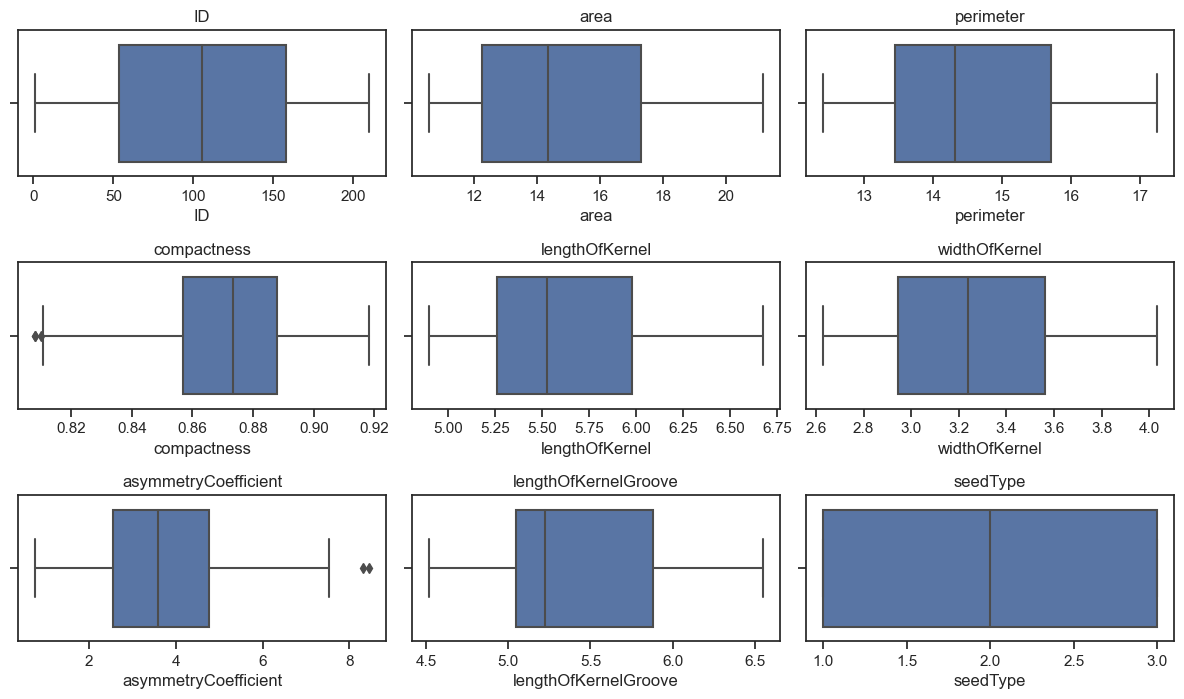

In [64]:
# Checking outliers
plt.figure(figsize=(12, 9))

for column in data.columns:
    plt.subplot(4,3, data.columns.get_loc(column)+1)
    sns.boxplot(x=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [65]:
# Checking missing values
missing_values = data.isna().sum()

print(missing_values)


ID                      0
area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64


In [66]:
# Feature Selection
X = data.copy()
X.drop('seedType', axis=1)

# Data scaling / normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

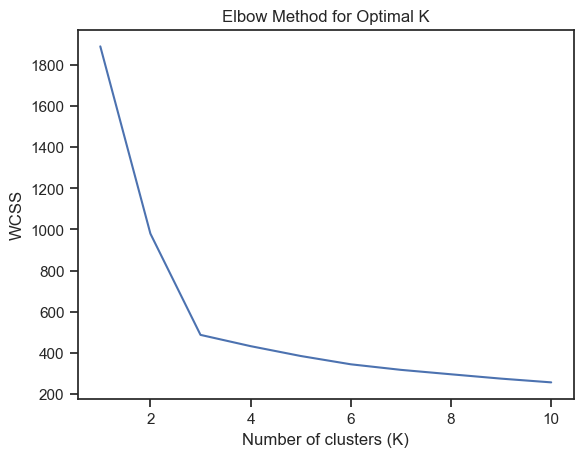

In [67]:
# checking optimal k with elbow
wcss = [] 

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

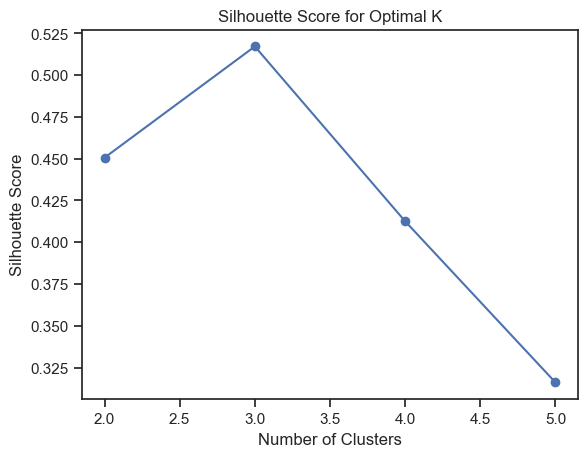

In [68]:
# checking optimal k with silhouette score

from sklearn.metrics import silhouette_score

max_clusters = 5  
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [69]:
# Optimal k from elbow is 2 or 3
# optimal k from silhouette is 3
# Will pick 3 as the cluster amount 
k = 3

# KMeans clustering, and adding Cluster_KMeans to data frame
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)


C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


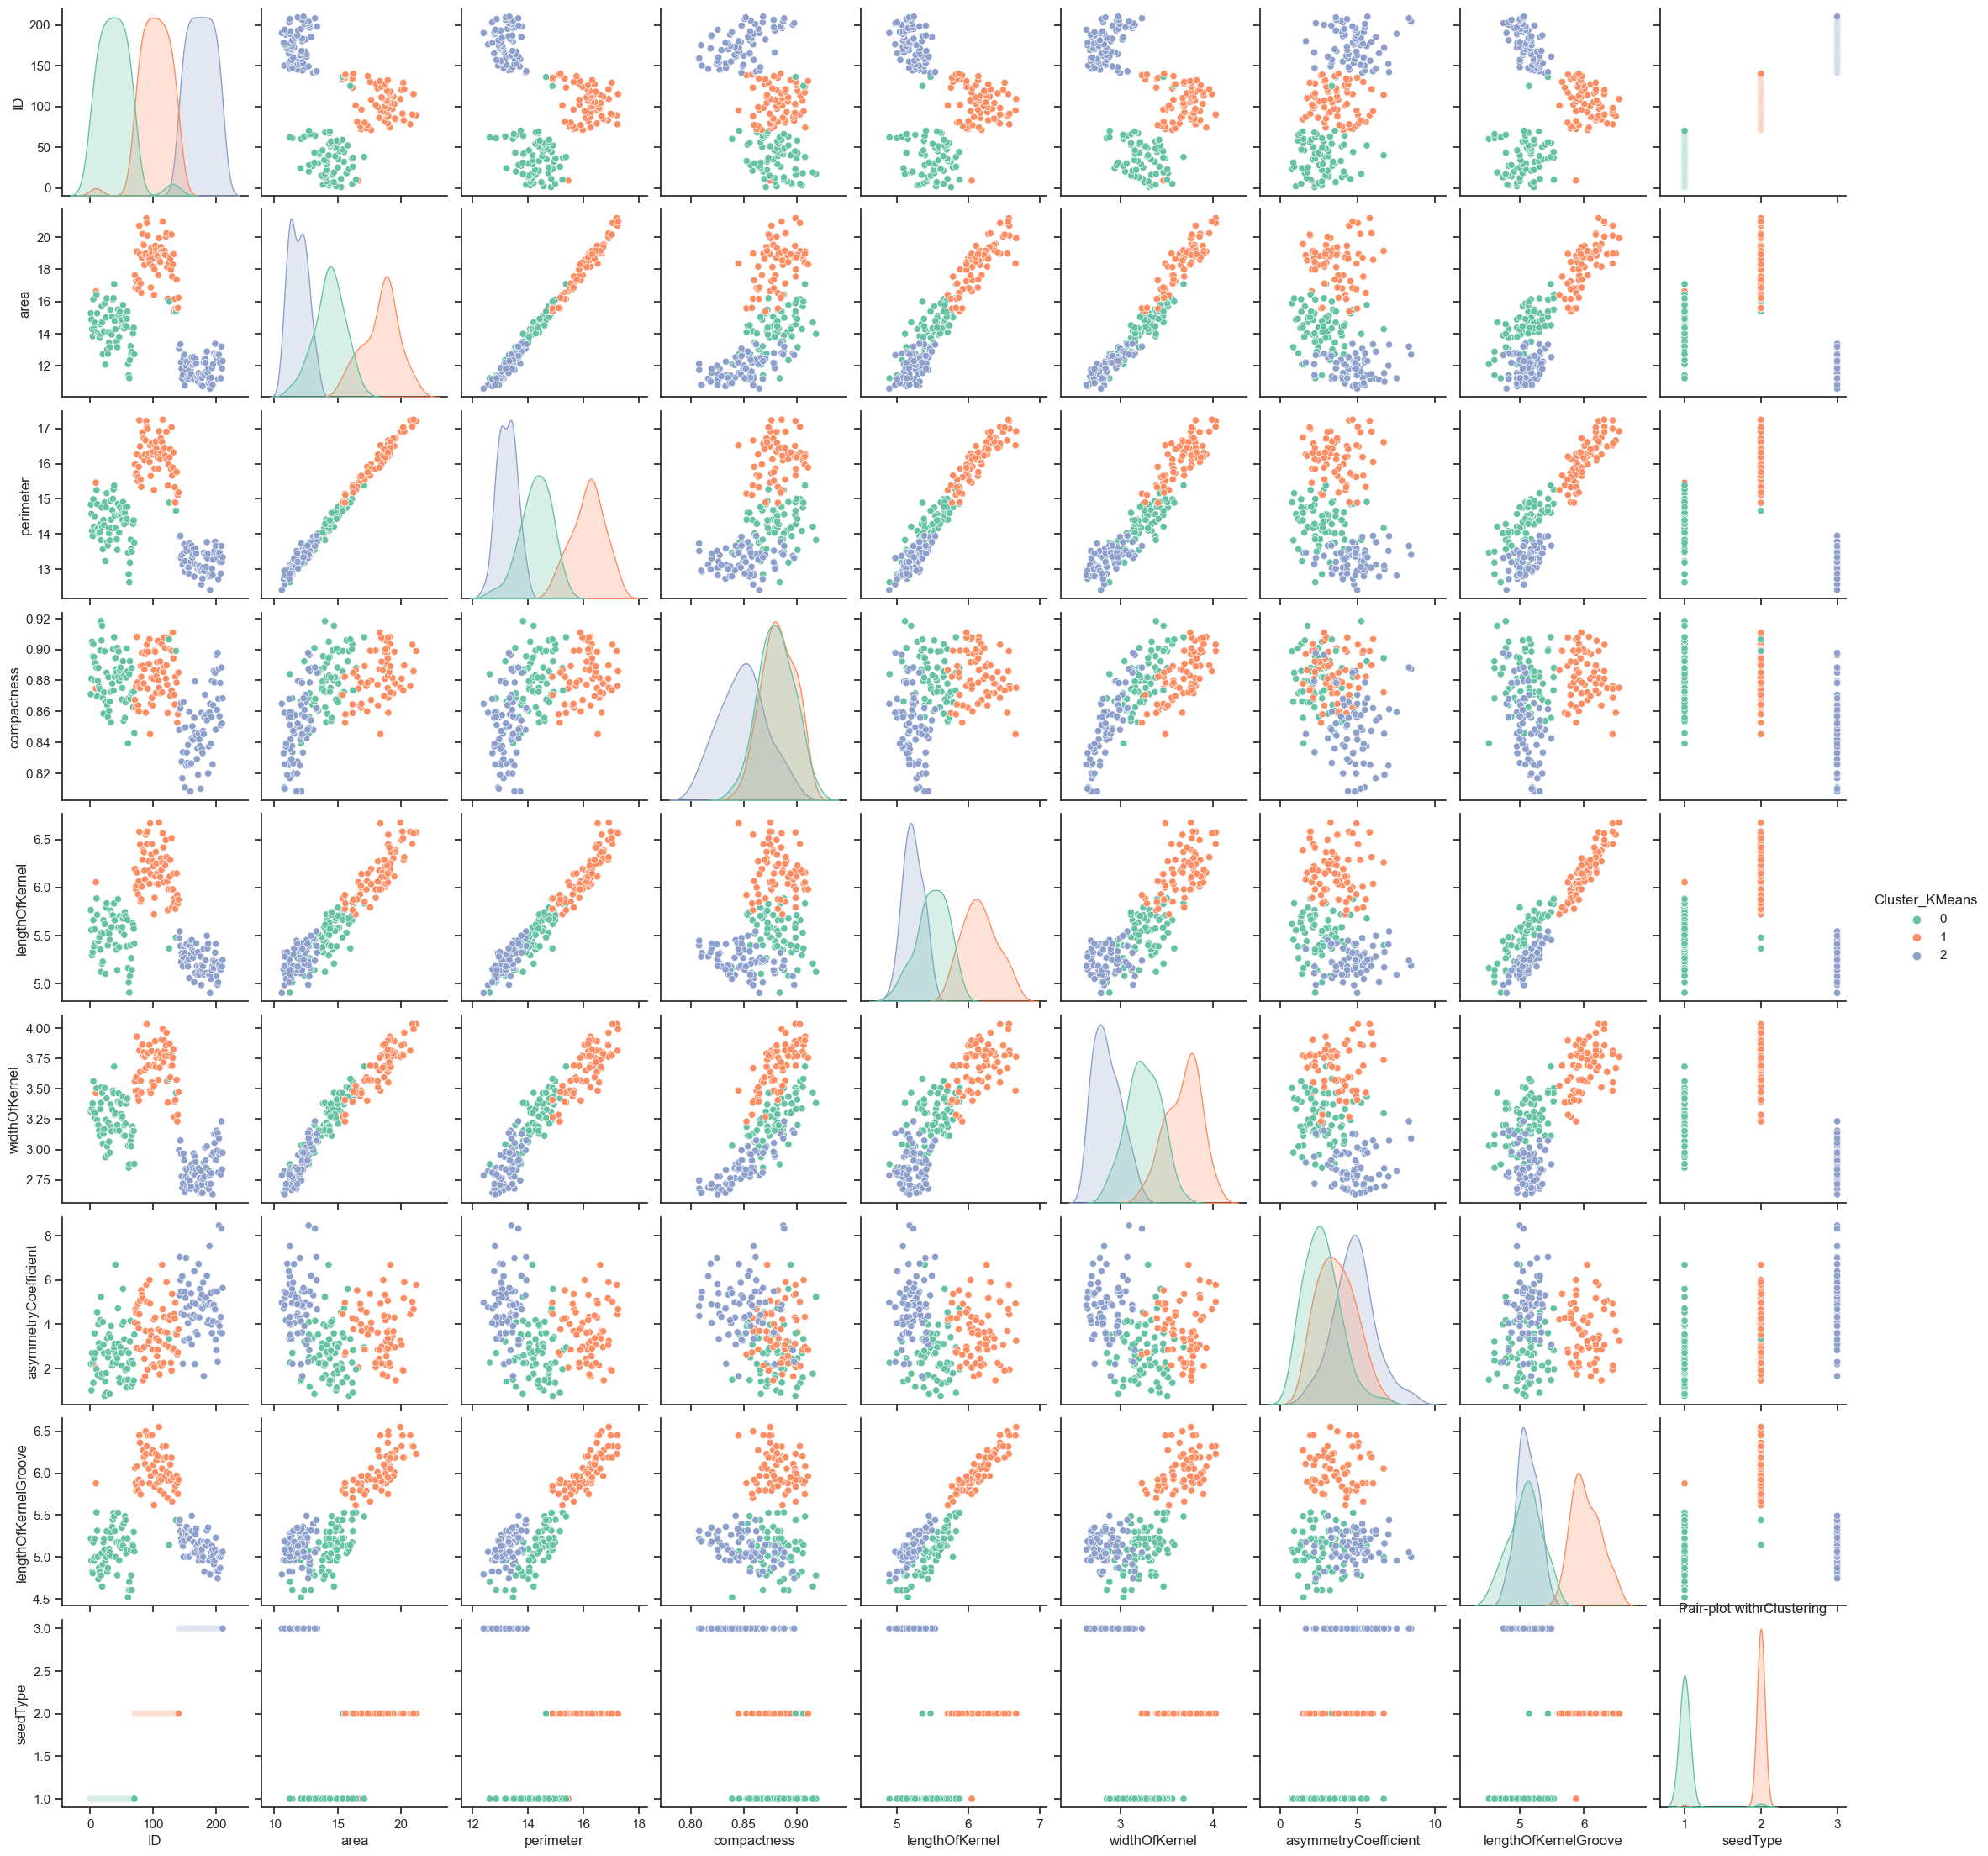

In [70]:
# pair plot for KMeans Clustering
sns.set(style="ticks")
sns.pairplot(data=data, hue="Cluster_KMeans", palette="Set2")
plt.title('Pair-plot with Clustering')
plt.show()

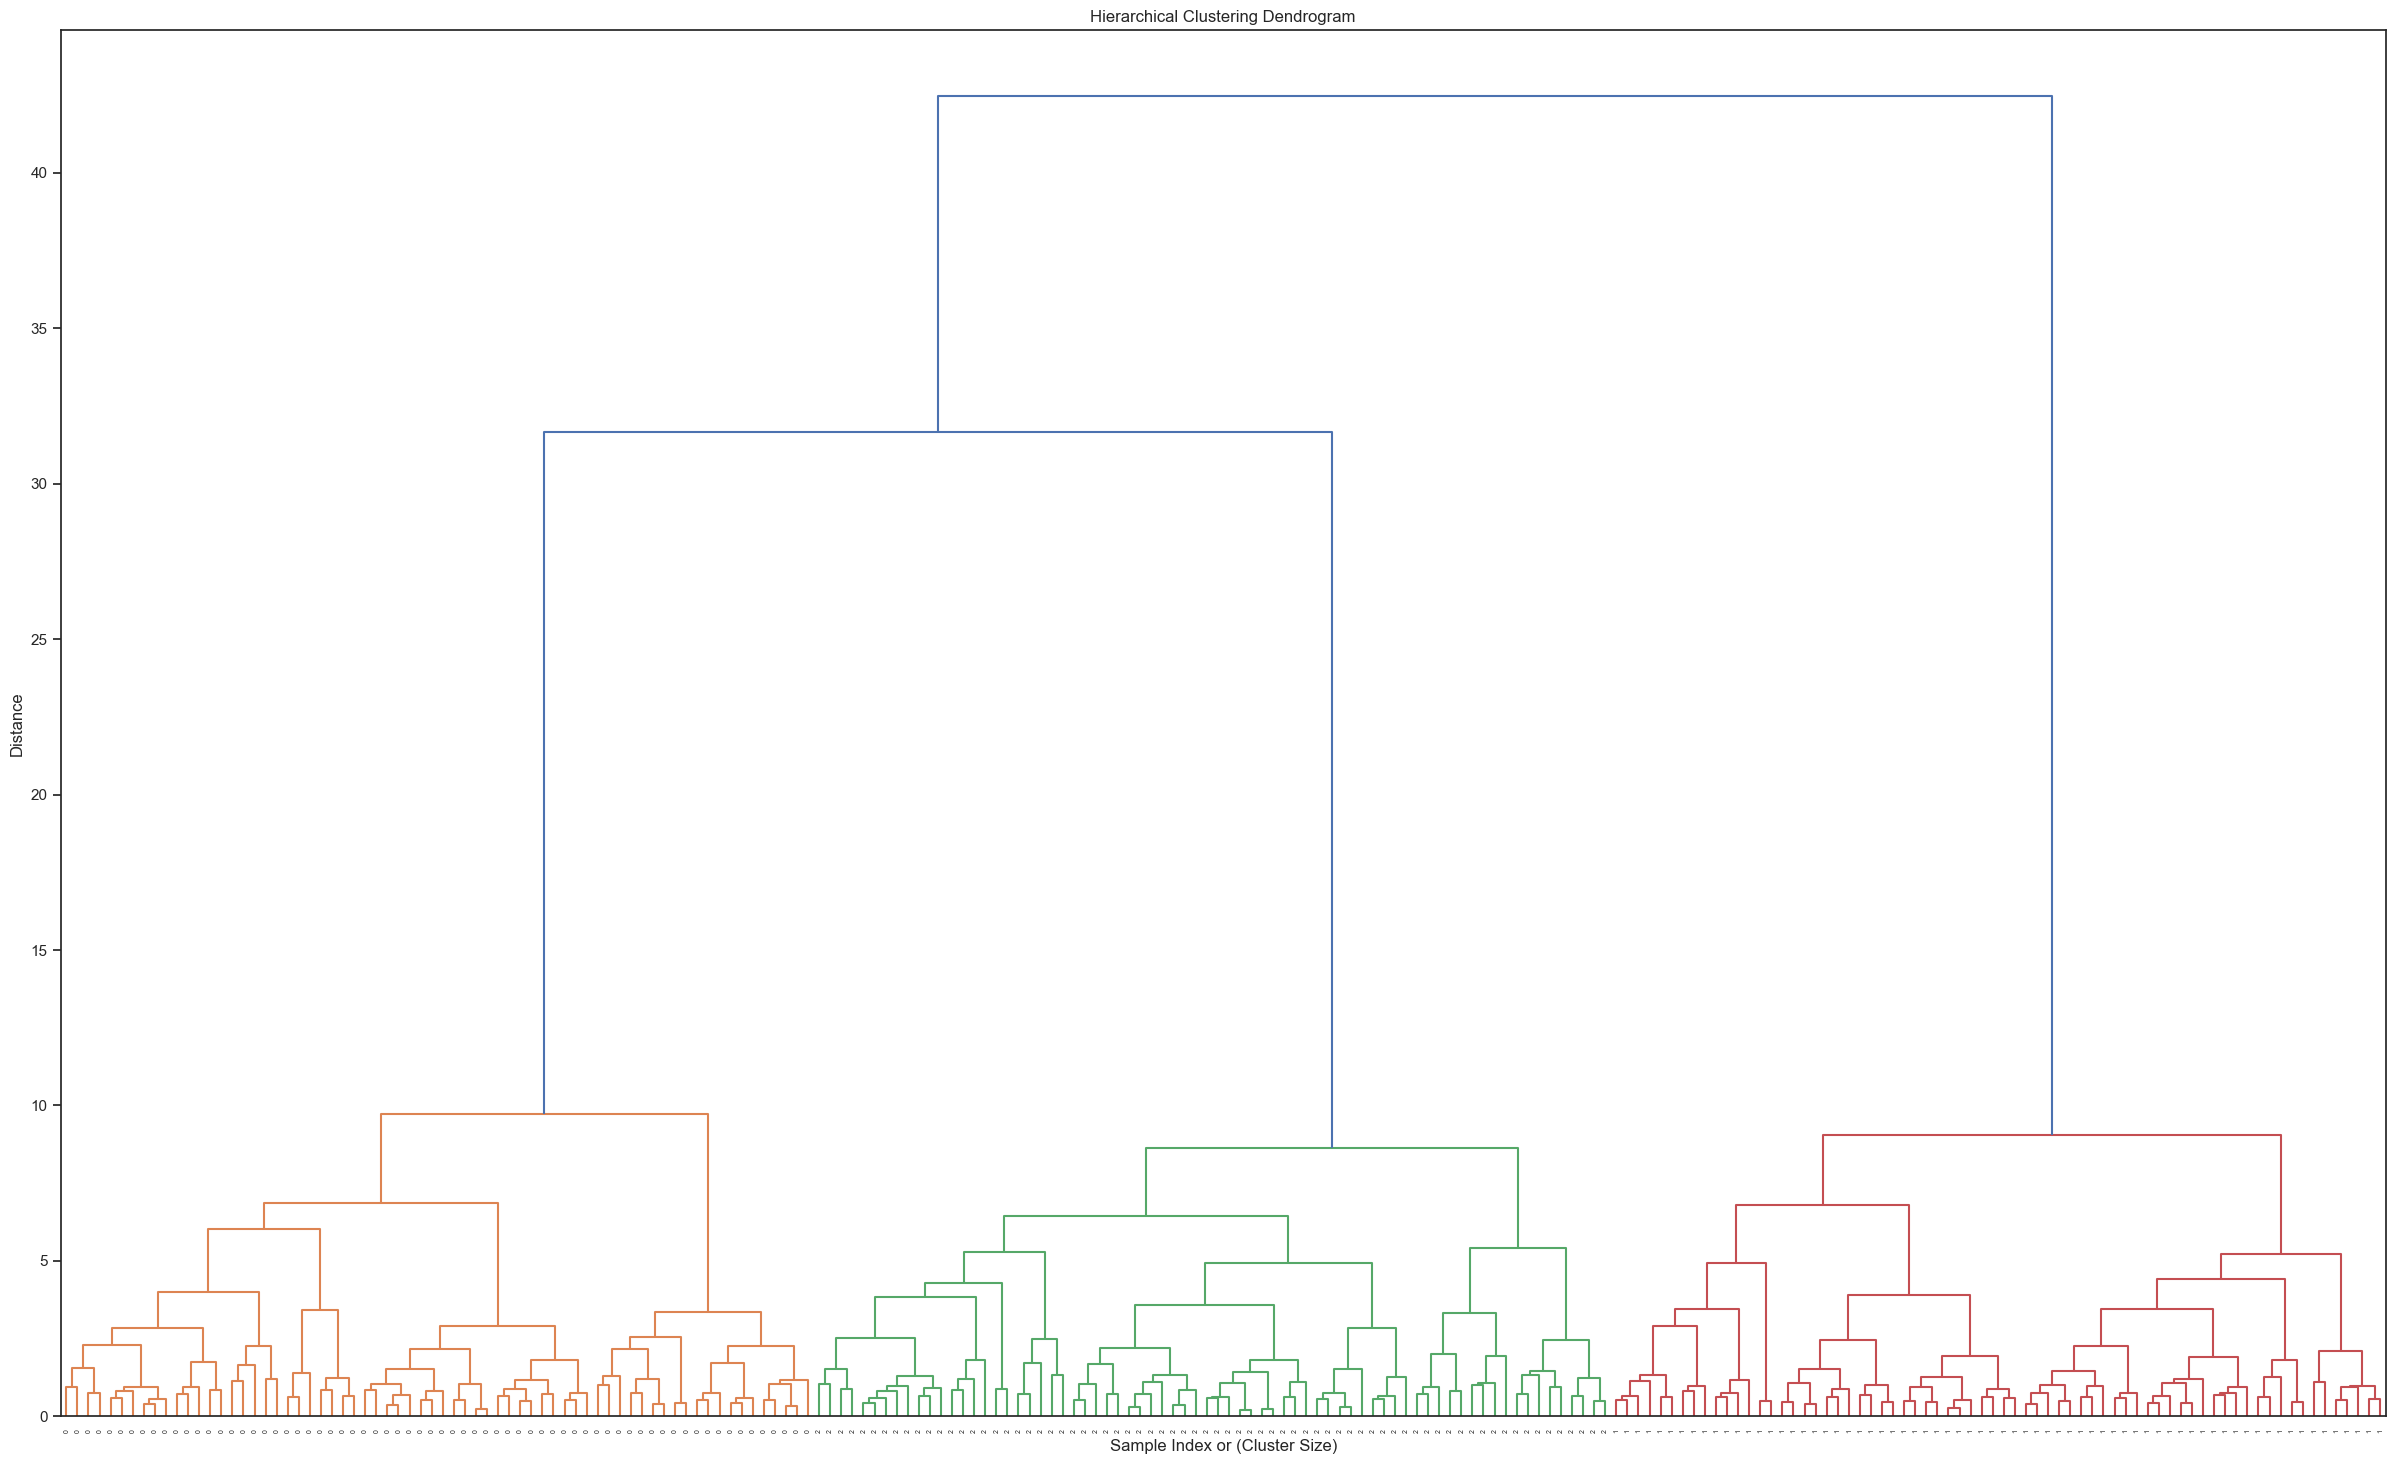

In [71]:
# Hierarchical clustering and plot 
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

data['Cluster_Hierarchical'] = agg_labels

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(30, 18))
dendrogram(linkage_matrix, orientation='top', labels=agg_labels, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

In [72]:
# Checking the best combination of epsilon and min sample for db scans
import numpy as np
from sklearn.cluster import DBSCAN

best_score = -1
best_eps = None
best_min_samples = None

for eps in np.arange(0.1, 2.0, 0.1):  # Adjust the range as needed
    for min_samples in range(2, 21):  # Adjust the range as needed
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        if  len(np.unique(labels)) == 1 :
            print(f'skipping check for eps = {eps} and min_samples = {min_samples}')
        else:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best silhouette score: {best_score}")
print(f"Best eps: {best_eps}")
print(f"Best min_samples: {best_min_samples}")

skipping check for eps = 0.1 and min_samples = 2
skipping check for eps = 0.1 and min_samples = 3
skipping check for eps = 0.1 and min_samples = 4
skipping check for eps = 0.1 and min_samples = 5
skipping check for eps = 0.1 and min_samples = 6
skipping check for eps = 0.1 and min_samples = 7
skipping check for eps = 0.1 and min_samples = 8
skipping check for eps = 0.1 and min_samples = 9
skipping check for eps = 0.1 and min_samples = 10
skipping check for eps = 0.1 and min_samples = 11
skipping check for eps = 0.1 and min_samples = 12
skipping check for eps = 0.1 and min_samples = 13
skipping check for eps = 0.1 and min_samples = 14
skipping check for eps = 0.1 and min_samples = 15
skipping check for eps = 0.1 and min_samples = 16
skipping check for eps = 0.1 and min_samples = 17
skipping check for eps = 0.1 and min_samples = 18
skipping check for eps = 0.1 and min_samples = 19
skipping check for eps = 0.1 and min_samples = 20
skipping check for eps = 0.2 and min_samples = 2
skipping 

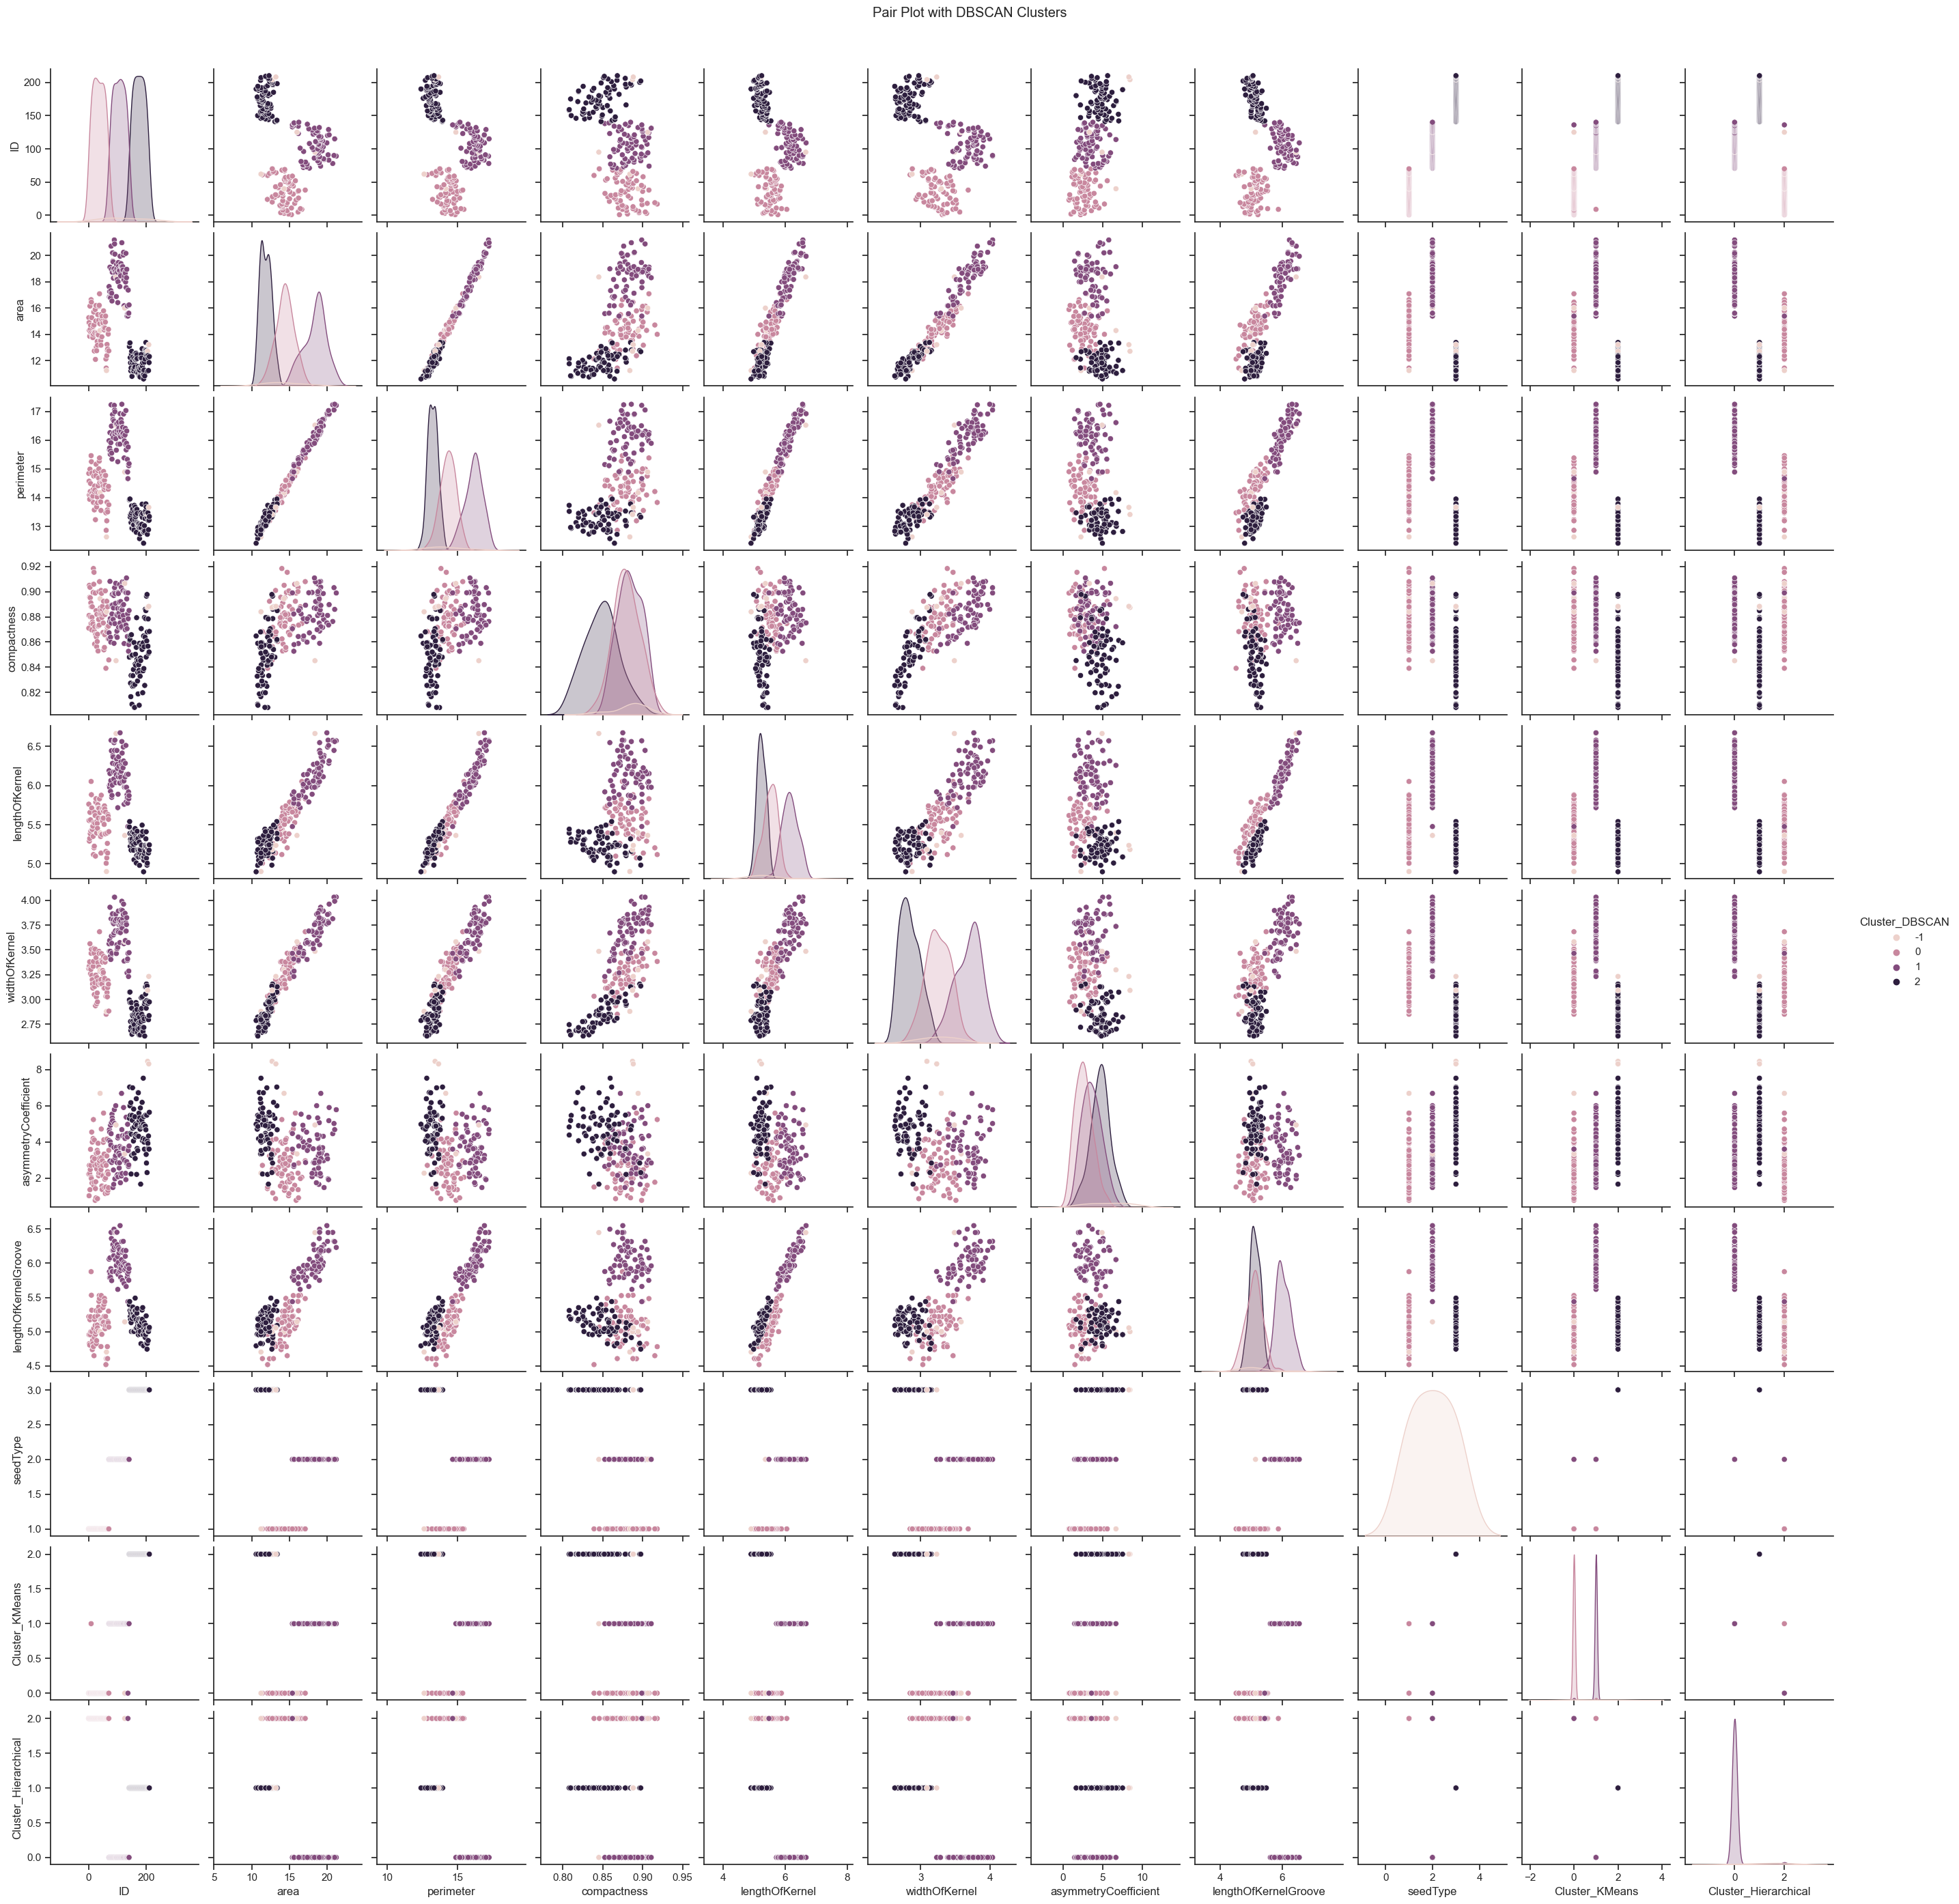

In [73]:
# db scan clustering and plotting with best eps and min sample from previous cell
db = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

data['Cluster_DBSCAN'] = labels

sns.set(style="ticks")
sns.pairplot(data, hue="Cluster_DBSCAN")
plt.suptitle("Pair Plot with DBSCAN Clusters", y=1.02)
plt.show()
